In [15]:
import pandas as pd

In [16]:
df= pd.read_csv("only_variable_with_corr_name.csv")

In [17]:
df= df.dropna()


KeyError: "None of [Index([ 18,  81, 186, 207, 216, 308, 326, 352, 358, 370, 385, 422, 427, 515,\n       683, 710, 728, 737, 750, 833, 883, 956, 968],\n      dtype='int64')] are in the [index]"

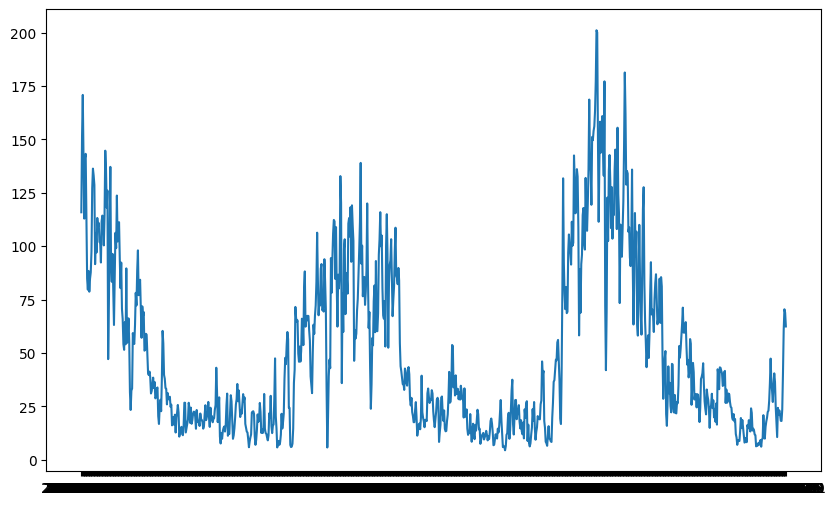

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, cwt, ricker

# Load your data
# Replace 'your_data.csv' with the actual file path or DataFrame variable containing your data


# Choose a specific station
station_name = 'Victoria'

# Filter data for the chosen station
station_data = df[df['Station Name'] == station_name]

# Select relevant columns (assuming 'Time' and 'PM 2.5' are column names)
time_series = station_data['Time']
pm25_values = station_data['PM 2.5']

# Perform continuous wavelet transform (CWT) using Ricker wavelet
widths = np.arange(1, 31)
cwt_result = cwt(pm25_values, ricker, widths)

# Find peaks in the CWT result
peaks, _ = find_peaks(np.sum(cwt_result, axis=0), height=100)  # Adjust height parameter as needed

# Plot the original PM 2.5 values
plt.figure(figsize=(10, 6))
plt.plot(time_series, pm25_values, label='Original PM 2.5')
plt.scatter(time_series[peaks], pm25_values.iloc[peaks], color='red', marker='x', label='Wavelet Peaks')
plt.title('Original PM 2.5 Values with Wavelet Peaks')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.legend()
plt.show()
